<a href="https://colab.research.google.com/github/Biruk-gebru/Icog-classes/blob/main/Task_QC_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Install the Qiskit library for quantum computing. Uncomment the line below to install it.
#!pip install qiskit

# Install the Qiskit Aer library for high-performance simulation. Uncomment the line below to install it.
#!pip install qiskit-aer  # Remove this line to install Qiskit without Aer

# Importing the main Qiskit library to access quantum computing functionalities
import qiskit

# Importing the plot_histogram function for visualizing measurement results in histogram format
from qiskit.visualization import plot_histogram

# Importing transpile for optimizing quantum circuits before execution (optional for better performance)
from qiskit import transpile

# Importing the Aer module from Qiskit Aer for accessing high-performance simulators
from qiskit_aer import Aer

#Import numpy
import numpy as np

# **Create a Quantum Circuit with a Hadamard Gate**

- Write a Qiskit program to create a single-qubit circuit.
- Apply a Hadamard gate to the qubit.
- Measure the qubit and visualize the result using a histogram.

        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 


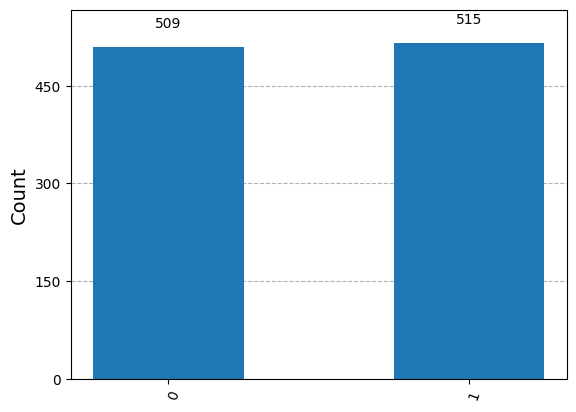

In [41]:
qc = qiskit.QuantumCircuit(1)  # Initializing a quantum circuit with 1 qubit

# Applying the Hadamard gate to the qubit
qc.h(0)  # The Hadamard gate (h) is applied to qubit 0, putting it into superposition

# Measuring the qubit to obtain a classical result
qc.measure_all()  # Measuring all qubits in the circuit and storing the result in classical bits

# Drawing the circuit structure for visualization
print(qc.draw())  # Displaying the circuit diagram

# Simulating the circuit using the Qiskit Aer simulator
simulator = Aer.get_backend('aer_simulator')  # Selecting the simulator backend

# Transpile the circuit for the simulator (optional but recommended for optimization)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the simulator with 1024 shots (repetitions)
job = simulator.run(compiled_circuit, shots=1024)

# Get the results of the measurement
result = job.result()

# Retrieving the counts (measurement outcomes) from the result
counts = result.get_counts(qc)  # Getting the measurement results

# Visualizing the results using a histogram
plot_histogram(counts)  # Creating and displaying a histogram of the measurement outcomes

# **Implement a Quantum Coin Flip**
- Simulate a fair coin flip using a quantum circuit.
- Print the probability of getting Heads or Tails.

In [44]:
# Create a quantum circuit with 1 qubit and 1 classical bit
coin = qiskit.QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit
# This puts the qubit into a superposition state
coin.h(0)

# Measure the qubit and store the result in the classical bit
coin.measure(0, 0)

# Choose the Aer simulator backend for simulation
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit for the simulator (optional but recommended for optimization)
compiled_circuit = transpile(coin, simulator)

# Execute the circuit on the simulator with 1024 shots (repetitions)
job = simulator.run(compiled_circuit, shots=1024)

# Get the results of the measurement
result = job.result()

# Retrieve the measurement counts (number of times we got 0's and 1's)
counts = result.get_counts()

# Calculate and print the probability of measuring heads (1) and tails (0)
probability_heads = counts.get("1", 0) / (counts.get("1", 0) + counts.get("0", 0))
probability_tails = counts.get("0", 0) / (counts.get("1", 0) + counts.get("0", 0))
print("Probability of heads = ", probability_heads)
print("Probability of tails = ", probability_tails)

Probability of heads =  0.4853515625
Probability of tails =  0.5146484375


# **Implement a Bell State (Entanglement)**
- Create a two-qubit circuit.
- Apply a Hadamard gate to the first qubit and a CNOT gate between the two qubits.
- Measure both qubits and verify if they are always correlated.

In [46]:
# Create a two-qubit quantum circuit
circ = qiskit.QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit (qubit 0)
# This puts the first qubit into a superposition state
circ.h(0)

# Apply a CNOT gate (controlled-NOT) with qubit 0 as control and qubit 1 as target
# This entangles the two qubits, making their states correlated
circ.cx(0, 1)

# Measure both qubits and store the results in classical bits
circ.measure_all()

# Choose the Aer simulator backend for simulation
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit for the simulator (optional but recommended for optimization)
compiled_circuit = transpile(circ, simulator)

# Execute the circuit on the simulator with a specified number of shots (e.g., 1024)
job = simulator.run(compiled_circuit, shots=1024)

# Get the results of the measurement
result = job.result()

# Retrieve the measurement counts (number of times each outcome occurred)
counts = result.get_counts()

# Print the measurement counts for verification
print("Measurement counts:", counts)

# Verify correlation: check if the counts indicate correlated results
# For correlated outcomes of (00) and (11)
correlated_pairs = counts.get('00', 0) + counts.get('11', 0)
total_counts = sum(counts.values())  # Total number of counts observed

# Calculate probability of correlated outcomes
probability_correlated = correlated_pairs / total_counts if total_counts > 0 else 0

# Print the probability of correlated outcomes
print("Probability of correlated outcomes (00 or 11) =", probability_correlated)

# Conclusion: In a perfect implementation, this probability should be close to 1,
# indicating that the outcomes are always correlated (either both are 0 or both are 1).

Measurement counts: {'00': 524, '11': 500}
Probability of correlated outcomes (00 or 11) = 1.0


# **Generate Plus state**
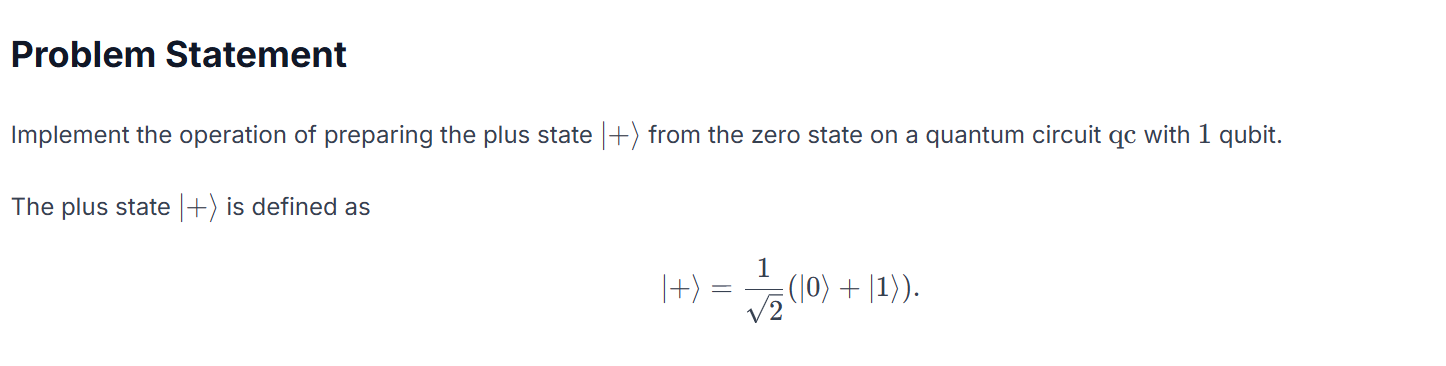

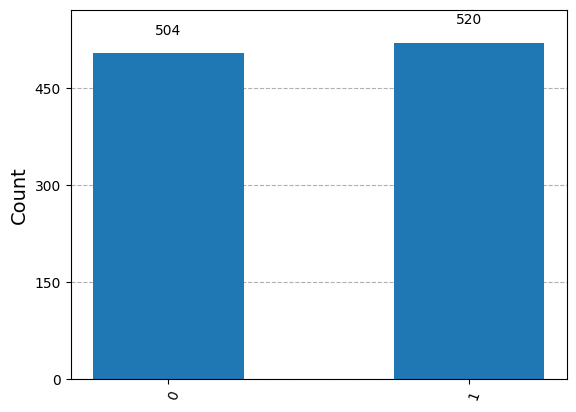

In [48]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qc = qiskit.QuantumCircuit(1, 1)  # Initializing a quantum circuit with 1 qubit and 1 classical bit

# Manually initialize the qubit to the |+⟩ state
# The state |+⟩ is represented as [1/sqrt(2), 1/sqrt(2)] in vector form
plus_state = [1/np.sqrt(2), 1/np.sqrt(2)]

qc.initialize(plus_state, 0)  # Initialize qubit 0 to the |+⟩ state

# Measure the qubit to obtain a classical result
qc.measure(0, 0)  # Measuring qubit 0 and storing the result in classical bit 0

# Choose the Aer simulator backend for simulation
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit for the simulator (optional but recommended for optimization)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the simulator with a specified number of shots (e.g., 1024)
job = simulator.run(compiled_circuit, shots=1024)

# Get the results of the measurement
result = job.result()    # Running the circuit with 1024 shots for statistical relevance

# Get the results of the measurement
result = job.result()  # Retrieving the result of the executed job

# Retrieve the counts (measurement outcomes) from the result
counts = result.get_counts(qc)  # Getting the measurement results indicating how many times each state was observed

# Visualizing the results using a histogram
plot_histogram(counts)  # Creating and displaying a histogram of the measurement outcomes

# **Theory Checkins**

### **How does superposition affect the information processing capabilities of a quantum computer?**

Parallelism: If a quantum computer has n qubits, it can represent 2^n states simultaneously, enabling extensive parallel processing of information that classical computers cannot achieve.

Exponential Growth: Each additional qubit exponentially increases the computational capacity, allowing the quantum system to explore an exponentially larger solution space.

Interference: Quantum algorithms utilize constructive and destructive interference to amplify the probability of correct outcomes while canceling out incorrect ones, enhancing overall computational efficiency.

Complexity Reduction: Quantum computers can solve certain complex problems, such as integer factorization and unstructured searches, much more efficiently than classical computers, reducing the time complexity of these tasks dramatically.

###How do quantum gates manipulate interference to solve problems faster than classical computers?

Quantum gates manipulate interference by combining qubits in superposition, allowing for multiple computation paths simultaneously. They control the phases of these paths, reinforcing the probability of correct solutions (constructive interference) while canceling out incorrect ones (destructive interference). This enables quantum algorithms to explore solution spaces more efficiently, resulting in faster problem-solving compared to classical methods.

### How does measurement collapse a quantum state, and why is it important in quantum computing algorithms?

Measurement collapses a quantum state by forcing it into one of its basis states, either
∣0⟩ or ∣1⟩, based on the probabilities defined by the state's superposition. This is important in quantum computing algorithms because it allows for the extraction of information after processing, determining the output of the computation and enabling the evaluation of quantum algorithms' results.